# Testing new method

## Time

In [9]:
from viewf import viewf_2022
import numpy as np
from osgeo import gdal

import time
start_time = time.time()


if __name__ == '__main__':

    path = '/Users/brent/Documents/DEM_DATA/PRISMA/HARVARD/albedo/PRS_20191217180424_20191217180428_0001_albedo/dem_Copernicus/dem_prj.tif'

    dem_svf = (np.array(gdal.Open(path).ReadAsArray())).astype('double')

    svf, tcf = viewf_2022(n_cpu=10, 
                          dem=dem_svf, 
                          spacing=30, 
                          n_angles=72)
    
    print("--- %s seconds ---" % (time.time() - start_time))

--- 10.811975955963135 seconds ---


## Varying of n_angles

In [10]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

if __name__ == '__main__':

    svf104, _ = viewf_2022(n_cpu=10, 
                          dem=dem_svf, 
                          spacing=30, 
                          n_angles=104)
    svf104 = svf104.flatten()


    svf88, _ = viewf_2022(n_cpu=10, 
                          dem=dem_svf, 
                          spacing=30, 
                          n_angles=88)
    svf88 = svf88.flatten()
    rmse88 = mean_squared_error(svf104, svf88, squared=False)   
    
    svf72, _ = viewf_2022(n_cpu=10, 
                        dem=dem_svf, 
                        spacing=30, 
                        n_angles=72)
    svf72 = svf72.flatten()
    rmse72 = mean_squared_error(svf104, svf72, squared=False)

    svf64, _ = viewf_2022(n_cpu=10, 
                        dem=dem_svf, 
                        spacing=30, 
                        n_angles=64)
    svf64 = svf64.flatten()
    rmse64 = mean_squared_error(svf104, svf64, squared=False)
    
    svf32, _ = viewf_2022(n_cpu=10, 
                        dem=dem_svf, 
                        spacing=30, 
                        n_angles=32)
    svf32 = svf32.flatten()
    rmse32 = mean_squared_error(svf104, svf32, squared=False)
    
    svf16, _ = viewf_2022(n_cpu=10, 
                    dem=dem_svf, 
                    spacing=30, 
                    n_angles=16)
    svf16 = svf16.flatten()
    rmse16 = mean_squared_error(svf104, svf16, squared=False)
    


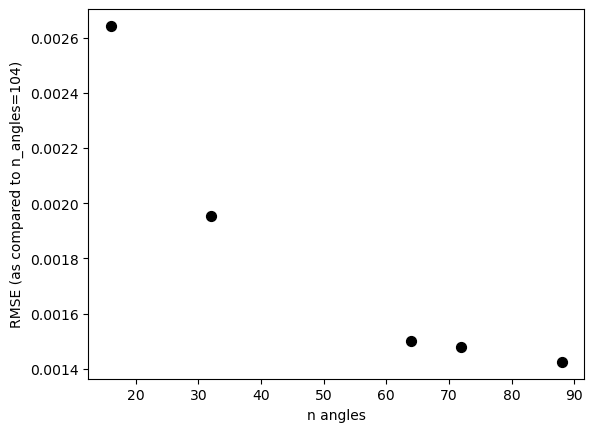

In [11]:
plt.scatter([16, 32, 64, 72, 88], [rmse16, rmse32, rmse64, rmse72, rmse88], s=50, color='k')
plt.xlabel('n angles')
plt.ylabel('RMSE (as compared to n_angles=104)')
plt.show()